In [263]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import os
import matplotlib.pyplot as plt
from math import trunc

In [7]:
metrics = pd.read_csv('iic3633-metricas.csv', sep=';')

In [28]:
metrics = metrics.iloc[0:3]

In [29]:
metrics

,modelName,MAP@10,nDCG@10,Recall@10,Precision@10,MRR@10,Novelty@10,Diversity@10,MAP@20,nDCG@20,Recall@20,Precision@20,MRR@20,Novelty@20,Diversity@20
0,LLaVA-KNN (most similar),0.003791,0.036510,0.036101,0.003791,0.020197,8.530156,0.781949,0.002708,0.050252,0.048736,0.002617,0.021150,8.561163,0.750181
1,LLaVA KNN (mean),0.005235,0.044837,0.044224,0.005054,0.029372,8.545793,0.781949,0.003520,0.059834,0.058363,0.003430,0.030457,8.574840,0.751805
2,LightFM,0.003069,0.025185,0.024729,0.003069,0.014034,6.715657,0.963718,0.003249,0.049101,0.048616,0.003159,0.022068,7.222828,0.887726


In [91]:
metrics

,modelName,MAP@10,nDCG@10,Recall@10,Precision@10,MRR@10,Novelty@10,Diversity@10,MAP@20,nDCG@20,Recall@20,Precision@20,MRR@20,Novelty@20,Diversity@20
0,LLaVA-KNN (most similar),0.003791,0.036510,0.036101,0.003791,0.020197,8.530156,0.781949,0.002708,0.050252,0.048736,0.002617,0.021150,8.561163,0.750181
1,LLaVA KNN (mean),0.005235,0.044837,0.044224,0.005054,0.029372,8.545793,0.781949,0.003520,0.059834,0.058363,0.003430,0.030457,8.574840,0.751805
2,LightFM,0.003069,0.025185,0.024729,0.003069,0.014034,6.715657,0.963718,0.003249,0.049101,0.048616,0.003159,0.022068,7.222828,0.887726


In [95]:
models_and_metrics = {}
models = metrics['modelName']
metrics_for_reclist_10 = metrics.columns[1:8]
metrics_for_reclist_20 = metrics.columns[8:]

for model in models: 
    model_row = metrics[metrics['modelName'] == model]
    model_metrics_10 = model_row[metrics_for_reclist_10].values[0]
    
    model_metrics_20 = model_row[metrics_for_reclist_20].values[0]
    model_metrics = list(zip(model_metrics_10, model_metrics_20))
    models_and_metrics[model] = model_metrics

In [135]:
METRICS_NAMES = ['MAP', 'nDCG', 'Recall', 'Precision', 'MRR', 'Novelty', 'Diversity']
SUBMETRICS = ['10', '20']
X = np.arange(len(METRICS_NAMES))
WIDTH = 0.25


In [140]:
models_and_metrics

{'LLaVA-KNN (most similar)': [(0.0037906137184115, 0.0027075812274368),
  (0.0365095566525828, 0.0502516995998129),
  (0.0361010830324909, 0.0487364620938628),
  (0.0037906137184115, 0.0026173285198555),
  (0.0201965503409546, 0.0211504305457234),
  (8.530155799314224, 8.561162787036437),
  (0.7819494584837541, 0.7501805054151622)],
 'LLaVA KNN (mean)': [(0.0052346570397111, 0.0035198555956678),
  (0.0448365371449393, 0.0598342272249377),
  (0.0442238267148014, 0.0583634175691937),
  (0.0050541516245487, 0.0034296028880866),
  (0.0293722422783794, 0.0304569701400098),
  (8.54579321789936, 8.574839579615794),
  (0.7819494584837544, 0.7518050541516244)],
 'LightFM': [(0.0030685920577617, 0.0032490974729241),
  (0.0251846703935723, 0.0491010822724853),
  (0.0247292418772563, 0.0486161251504211),
  (0.0030685920577617, 0.0031588447653429),
  (0.0140335797375508, 0.0220679106081918),
  (6.715657384044507, 7.222827519837184),
  (0.9637184115523452, 0.8877256317689523)]}

In [142]:
idx2metric = { i : metric_name for i, metric_name in enumerate(METRICS_NAMES)}
metric2idx = { v : k for k, v in idx2metric.items() }

In [356]:
def plot_stacked_bars(metric): 
    cols = { submetric : [] for submetric in SUBMETRICS }
    for idx in range(len(SUBMETRICS)):
        for _ ,  metrics in models_and_metrics.items():
            specific_metric = metrics[metric2idx[metric]][idx]
            cols[SUBMETRICS[idx]].append(specific_metric)    


    df = pd.DataFrame(cols, index=models)
    ax = df.plot(kind='bar', stacked=False, color=['blue', 'skyblue'], figsize=(8, 7), width=0.6)
    
    for p in ax.patches:
        height = round(p.get_height(), 6)
        ax.annotate(
            str(height), 
            (p.get_x() * 1.01, height * 1.01), 
            fontsize=8)
            
    legend_labels = [f"{metric}@{submetric}" for submetric in SUBMETRICS]
    
    ax.legend(legend_labels)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='--', which='both', color='grey', alpha=0.5)
    
    plt.xlabel('Modelos')
    plt.xticks(rotation=0)

    plt.ylabel('Valor')
    plt.tight_layout()
    plt.title(metric)
    
    plt.subplots_adjust(top=0.8)
    plt.tight_layout(pad=2)  

    plt.savefig(f'images/{metric}.png', format='png')
    


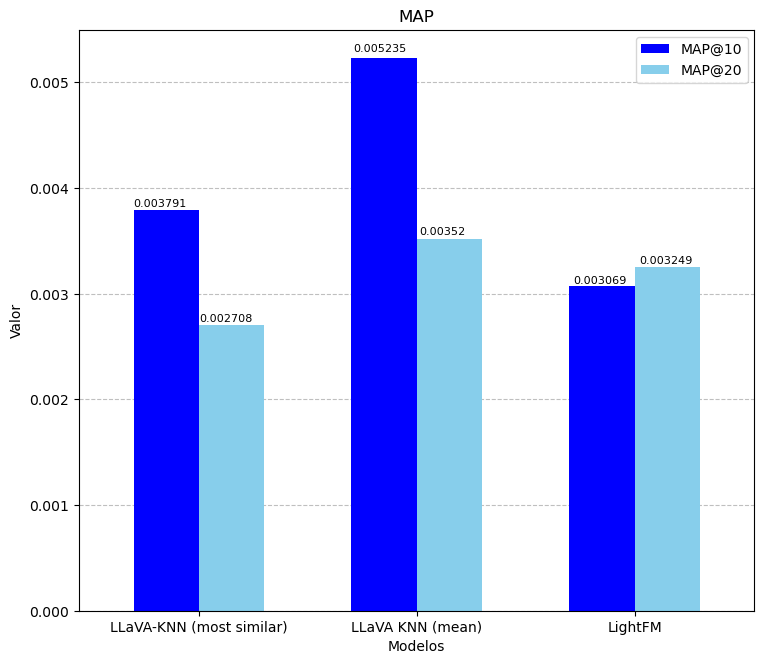

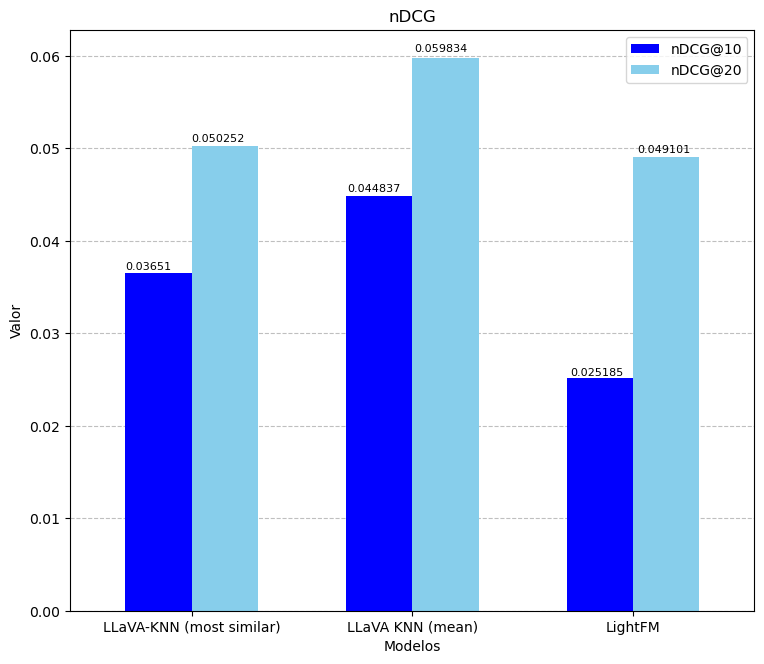

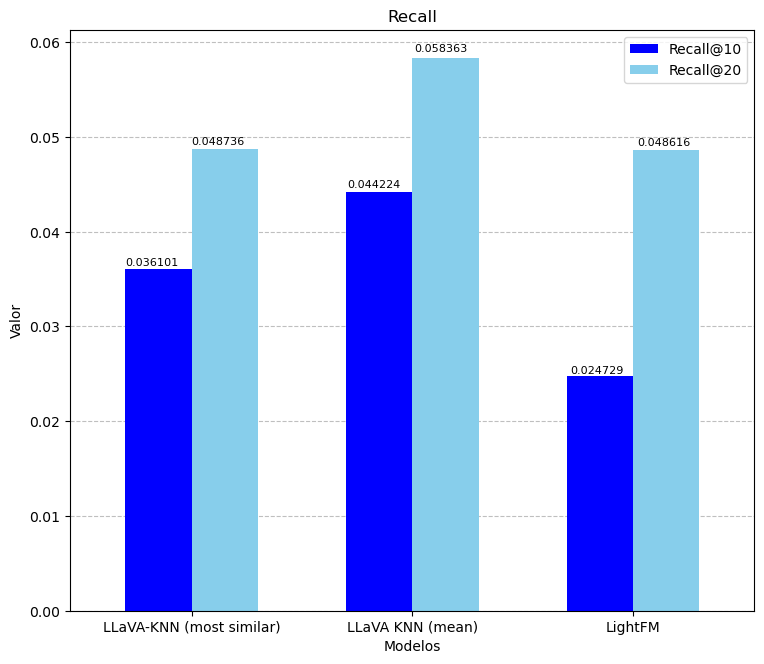

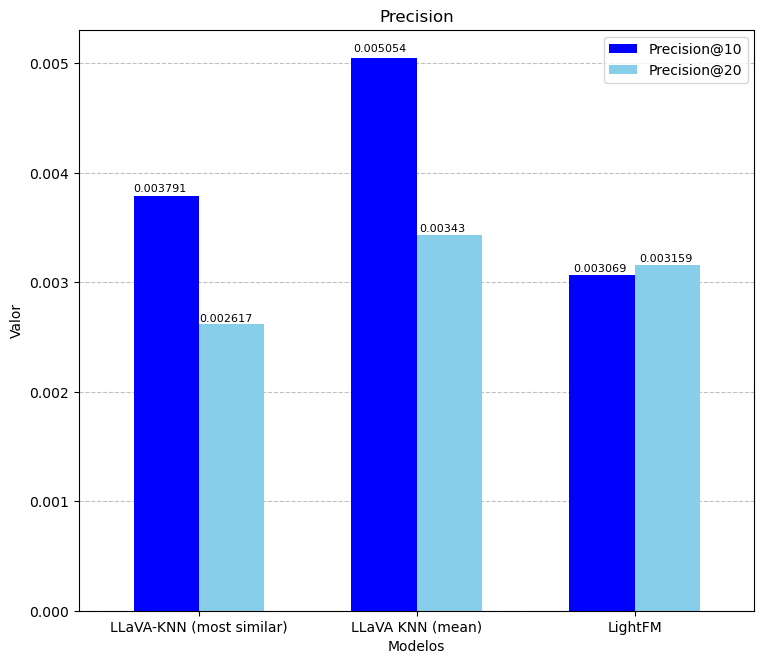

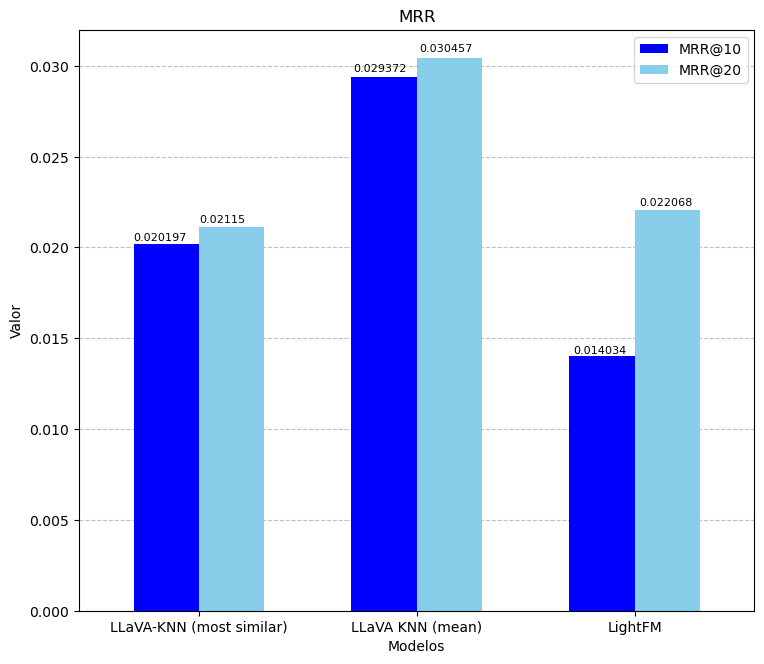

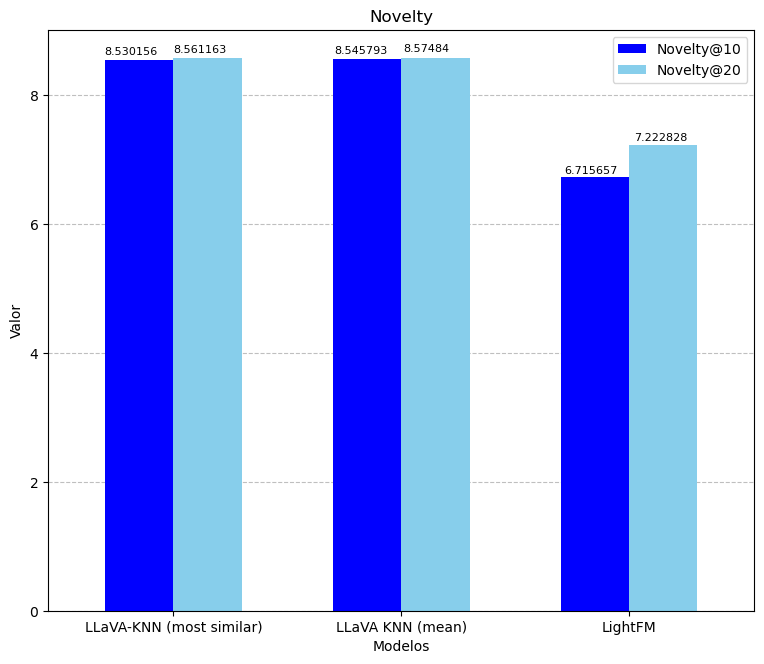

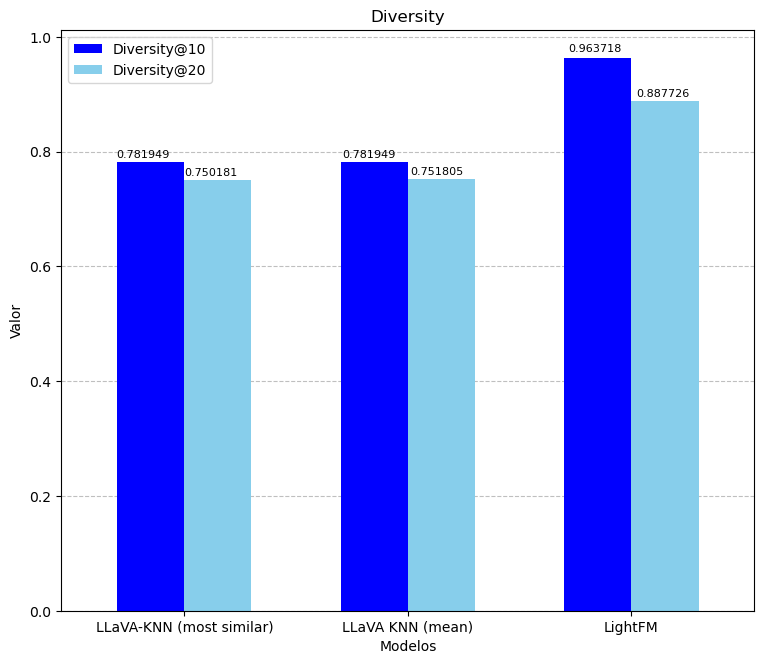

In [357]:
for metric in METRICS_NAMES:
    plot_stacked_bars(metric)